<a href="https://colab.research.google.com/github/cristhiansito123/mai_hand/blob/main/scripts/preprocessing/preprocessing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### reiniciar colab

In [ ]:
  !kill -9 -1

### intalar mediapipe

In [1]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 48.3 MB/s eta 0:00:00


### cargar la imagen

La imagen se cargó correctamente. Forma: (720, 1280, 3)


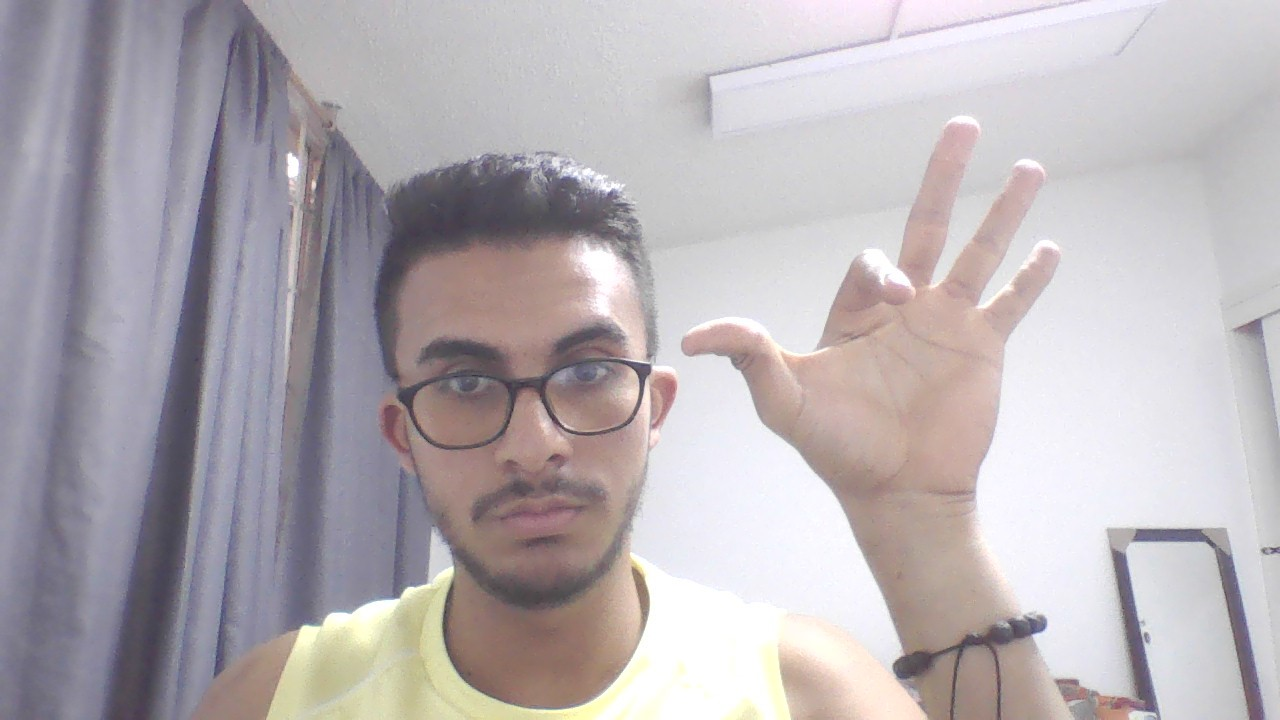

In [7]:
import csv
import cv2
from google.colab.patches import cv2_imshow

  # Cargar la imagen
imagen_path = '1.jpg'  # Ruta de la imagen

imagen = cv2.imread(imagen_path)

   # Verificar si la imagen se cargó correctamente

if imagen is None:
      print(f"No se pudo cargar la imagen en {imagen_path}")
else:
      print(f"La imagen se cargó correctamente. Forma: {imagen.shape}")

cv2_imshow(imagen)

### recortar la imagen:

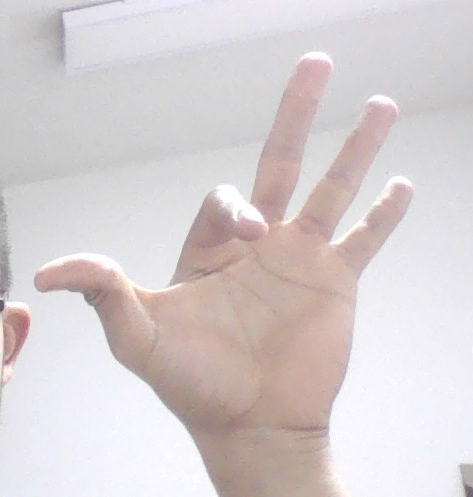

In [8]:
import cv2
import mediapipe as mp
import csv
from google.colab.patches import cv2_imshow

  # Configurar la detección de manos con Mediapipe
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands


with mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.5) as hands:
      # Convertir la imagen de BGR a RGB
      image_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
      # Procesar la imagen con Mediapipe
      resultado = hands.process(image_rgb)
      # Verificar si se detectó alguna mano

if resultado.multi_hand_landmarks:

      # Obtener los puntos de referencia de la mano
      mano_landmarks = resultado.multi_hand_landmarks[0]

      # Determinar los límites del rectángulo de recorte
      altura, ancho, _ = imagen.shape
      puntos_x = [punto.x * ancho for punto in mano_landmarks.landmark]
      puntos_y = [punto.y * altura for punto in mano_landmarks.landmark]
      min_x, max_x = int(min(puntos_x)), int(max(puntos_x))
      min_y, max_y = int(min(puntos_y)), int(max(puntos_y))

      # Determinar el factor de expansión del recorte
      factor_expansion = 0.2  # Ajusta este valor según tus necesidades (0.2 es solo un ejemplo)

      # Calcular los valores de expansión
      expansion_x = int((max_x - min_x) * factor_expansion)
      expansion_y = int((max_y - min_y) * factor_expansion)

      # Ajustar los límites del recorte
      min_x -= expansion_x
      max_x += expansion_x
      min_y -= expansion_y
      max_y += expansion_y

      # Asegurarse de que los límites no excedan las dimensiones de la imagen
      min_x = max(0, min_x)
      max_x = min(ancho - 1, max_x)
      min_y = max(0, min_y)
      max_y = min(altura - 1, max_y)

      # Recortar la imagen alrededor de la mano con los nuevos límites
      imagen_recortada = imagen[min_y:max_y, min_x:max_x]
      cv2_imshow(imagen_recortada)

### filtrar y guardar los vectores de la iamgen:

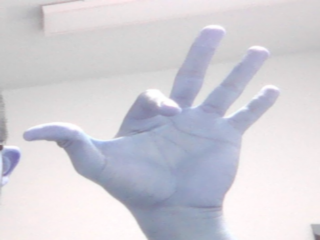

Se guardaron los puntos y vectores en landmarks.csv


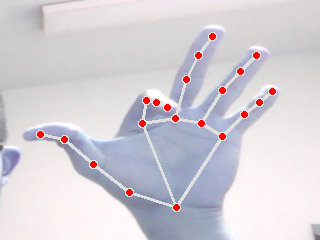

In [9]:
import cv2
import mediapipe as mp
import csv
from google.colab.patches import cv2_imshow

   # Configurar la detección de manos con Mediapipe
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands


with mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.5) as hands:
      # Convertir la imagen de BGR a RGB

      image_rgb = cv2.cvtColor(imagen_recortada, cv2.COLOR_BGR2RGB)
      blurred_image = cv2.GaussianBlur(image_rgb, (5, 5), 0)

      # Filtrado para priorizar la mano
      imagen_recortada2 = cv2.resize(blurred_image, (320, 240))

      # Procesar la imagen con Mediapipe
      resultado = hands.process(imagen_recortada2)
      # Verificar si se detectó alguna mano

      cv2_imshow(imagen_recortada2)

          # Guardar los puntos y vectores en un archivo CSV
if resultado.multi_hand_landmarks:

              hand_landmarks_cropped = resultado.multi_hand_landmarks[0]
              landmarks_data = []
              for landmark in hand_landmarks_cropped.landmark:
                  landmarks_data.append((landmark.x, landmark.y, landmark.z))

              csv_path = 'landmarks.csv'  # Ruta del archivo CSV
              with open(csv_path, 'w', newline='') as csv_file:
                  writer = csv.writer(csv_file)
                  writer.writerows(landmarks_data)

              print(f"Se guardaron los puntos y vectores en {csv_path}")

          # Mostrar la imagen final con los vectores y puntos
mp_drawing.draw_landmarks(
                            imagen_recortada2, hand_landmarks_cropped, mp_hands.HAND_CONNECTIONS
                        )
cv2_imshow(imagen_recortada2)

## Graficar los vectores guardados en csv

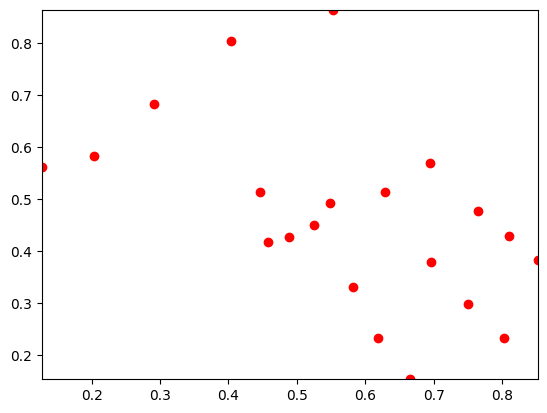

In [10]:
import cv2
import mediapipe as mp
import csv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

  # Leer los vectores del archivo CSV

vectores = []
with open('landmarks.csv' , 'r') as csvfile:
      reader = csv.reader(csvfile)
      for row in reader:
          x, y, *_ = map(float, row)
          vectores.append((x, y))

  # Crear una figura y un eje
fig, ax = plt.subplots()

  # Obtener las coordenadas x e y por separado
coordenadas_x = [vector[0] for vector in vectores]
coordenadas_y = [vector[1] for vector in vectores]

  # Dibujar los puntos en el gráfico
ax.plot(coordenadas_x, coordenadas_y, 'ro')

  # Configurar los límites del gráfico
min_x, max_x = min(coordenadas_x), max(coordenadas_x)
min_y, max_y = min(coordenadas_y), max(coordenadas_y)
ax.set_xlim(min_x, max_x)
ax.set_ylim(min_y, max_y)

  # Mostrar el gráfico
if __name__ == "__main__":
    plt.show()